In [1]:
%matplotlib inline
import numpy as np
import sys, scipy
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

sys.path.append('./src')
import similarityMatrix as sMatr
import laplacian

In [2]:
img = sMatr.getCircleMatrix() #get matrix with two circle at (28, 24) and (67, 58) with redius 16 and 5
a = sMatr.getDiagMatrix() #just regular diagonal matrix
o1 = sMatr.getOffDiagMatrix(5) #diagonal matrix with thickness at that time point
o2 = sMatr.getOffDiagMatrixII(5) #diagonal matrix with thickness along all time points
o3 = sMatr.getOffDiagMatrixIII(3,5) #diagonal matrix with thickness along all time points, with number of breaks

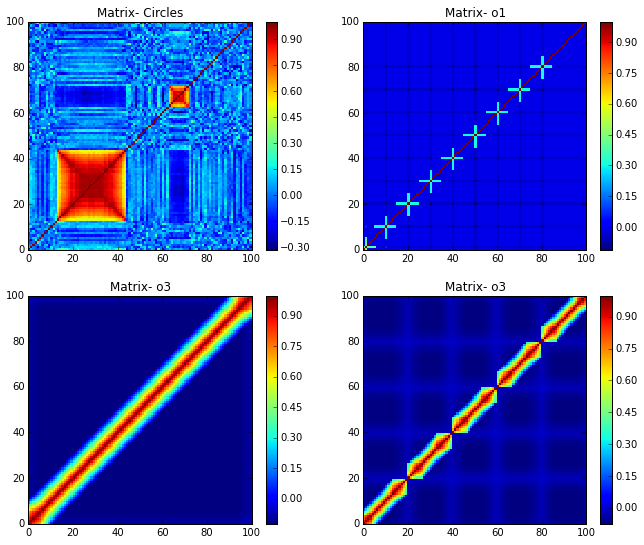

In [3]:
# plotting the correlation matrix
plt.subplot(2, 2, 1)
R = np.corrcoef(img)
plt.pcolor(R)
plt.colorbar()
plt.title('Matrix- Circles')


plt.subplot(2, 2, 2)
R = np.corrcoef(o1)
plt.pcolor(R)
plt.colorbar()
plt.title('Matrix- o1')

plt.subplot(2, 2, 3)
R = np.corrcoef(o2)
plt.pcolor(R)
plt.colorbar()
plt.title('Matrix- o3')

plt.subplot(2, 2, 4)
R = np.corrcoef(o3)
plt.pcolor(R)
plt.colorbar()
plt.title('Matrix- o3')

plt.show()

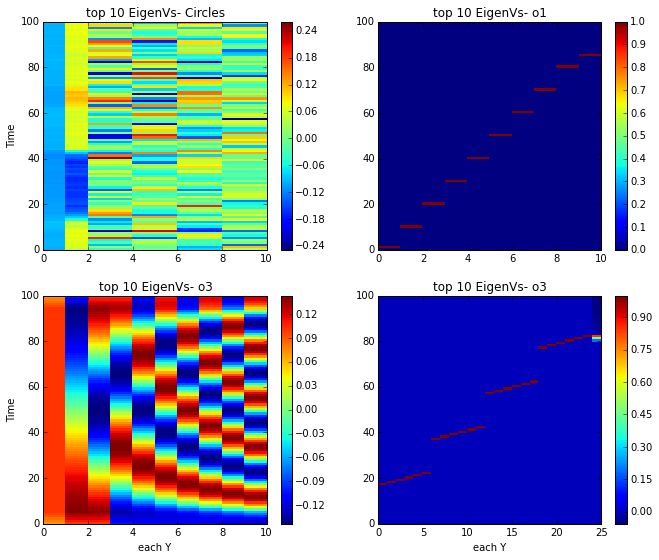

In [8]:
Y0 = laplacian.getNormLaplacian(img, 10)
Y1 = laplacian.getNormLaplacian(o1, 10)
Y2 = laplacian.getNormLaplacian(o2, 10)
Y3 = laplacian.getNormLaplacian(o3, 25)

plt.subplot(2, 2, 1)
plt.pcolor(Y0)
plt.colorbar()
plt.title('top 10 EigenVs- Circles')
plt.ylabel('Time')

plt.subplot(2, 2, 2)
plt.pcolor(Y1)
plt.colorbar()
plt.title('top 10 EigenVs- o1')

plt.subplot(2, 2, 3)
plt.pcolor(Y2)
plt.colorbar()
plt.title('top 10 EigenVs- o3')
plt.ylabel('Time')
plt.xlabel('each Y')

plt.subplot(2, 2, 4)
plt.pcolor(Y3)
plt.colorbar()
plt.title('top 10 EigenVs- o3')
plt.xlabel('each Y')

plt.show()

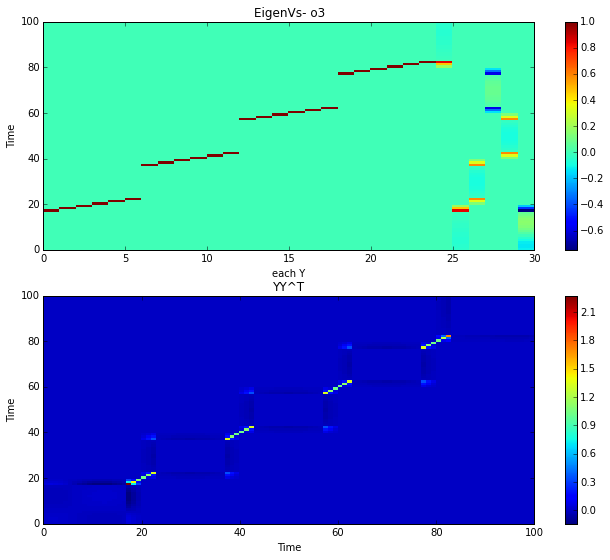

In [10]:
Y3 = laplacian.getNormLaplacian(o3, 30)
YY = np.dot(Y3[:,:], np.transpose(Y3)[:,:])

plt.subplot(2, 1, 1)
plt.pcolor(Y3)
plt.colorbar()
plt.title('EigenVs- o3')
plt.xlabel('each Y')
plt.ylabel('Time')

plt.subplot(2, 1, 2)
plt.pcolor(YY)
plt.colorbar()
plt.title('YY^T')
plt.ylabel('Time')
plt.xlabel('Time')
plt.show()